In [1]:
import warnings
warnings.filterwarnings('ignore')


For these examples we are going to use the library [MIP](https://www.python-mip.com/)

In [2]:
from mip import Model, xsum, maximize, BINARY

# The Knapsack problem

Knapsack Mixed Integer Linear Programming Problem
The knapsack problem is a classic optimization problem that involves selecting a subset of items with the highest total value, subject to a constraint on the total weight. Each item has a value $v_i$ and a weight $w_i$, and the goal is to maximize the total value of the items selected while ensuring that the total weight does not exceed a given capacity $c$.

We can formulate the problem as a mixed integer linear program as follows:

$$
\text{Maximize: } \sum_{i=1}^{n} v_i x_i
$$

Subject to:

$$
\begin{aligned}
\sum_{i=1}^{n} w_i x_i &\leq c x_i &\in \{0, 1\}, \text{ for } i = 1,2,\dots,n \end{aligned}
$$


where $x_i$ is a binary decision variable indicating whether or not item $i$ is selected. This formulation can be solved using various optimization solvers to obtain the optimal subset of items that maximizes the total value while satisfying the weight constraint.

**Model name:**

In [3]:
name_model = 'Knapsack'

*We first define the maximum capacity*

In [4]:
c = 15 #Capacity

*Then, the weight and value for each of the items*

In [5]:
v = [4, 2, 1, 10, 2] #Value
w = [12, 2, 1, 4, 1] #Weight
I = range(len(w)) #Set of items

In [6]:
import matplotlib.pyplot as plt

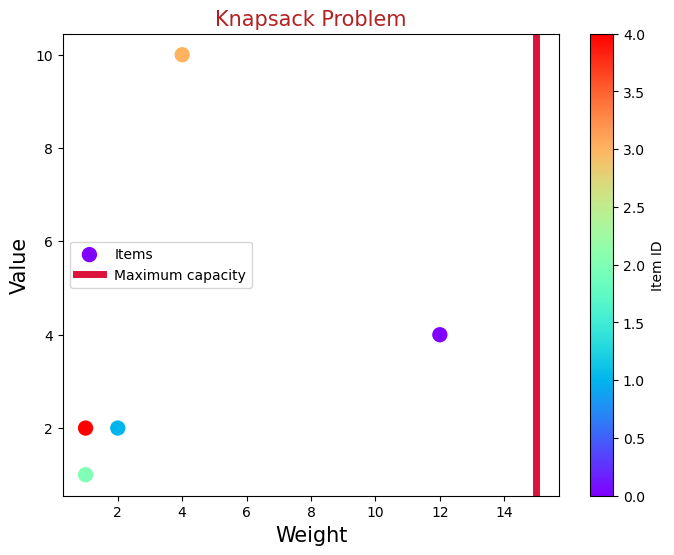

In [7]:
fig, ax = plt.subplots(figsize = [8, 6])
im = ax.scatter(w, v, s = 100, c=I, cmap = 'rainbow', label = 'Items')

# Plot the maximum weight constraint as a horizontal line
ax.axvline(x=c, linewidth = 5, color='crimson', label = 'Maximum capacity')

# Add labels to the axes and title to the plot
ax.set_xlabel('Weight', fontsize= 15)
ax.set_ylabel('Value', fontsize= 15)
ax.set_title('Knapsack Problem', color = 'firebrick', fontsize= 15)

# Display the plot
plt.legend()
plt.colorbar(im).set_label('Item ID')

We initialize the problem using the **Model** function from **MIP**

In [8]:
m = Model(name_model)

We add the different iterms to the problem

In [9]:
x = [m.add_var(var_type=BINARY) for i in I]

We give the model with the objective function to maximize

In [10]:
m.objective = maximize(xsum(v[i] * x[i] for i in I))

We define the constraints

In [11]:
m += xsum(w[i] * x[i] for i in I) <= c

**We optimize the model**

In [12]:
m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 28 2021 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 1 (0) rows, 5 (0) columns and 5 (0) elements
Clp1000I sum of infeasibilities 0 - average 0, 5 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-5) columns and 0 (-5) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 17.333333
Clp0000I Optimal - objective value 17.333333
Clp0000I Optimal - objective value 17.333333
Clp0032I Optimal objective 17.33333333 - 0 iterations time 0.002, Idiot 0.00

Starting MIP optimization


<OptimizationStatus.OPTIMAL: 0>

**Extract results**

The variable x which we defined with the model inputs, has the information of wether this item has been selected or not during the optimization process.

In [13]:
selected = [i for i in I if x[i].x >= 0.99]

In [14]:
print("selected items: {}".format(selected))
print("Total value: {}".format(m.objective_value))

selected items: [1, 2, 3, 4]
Total value: 15.0


In [15]:
import numpy as np
selected = np.array(selected)

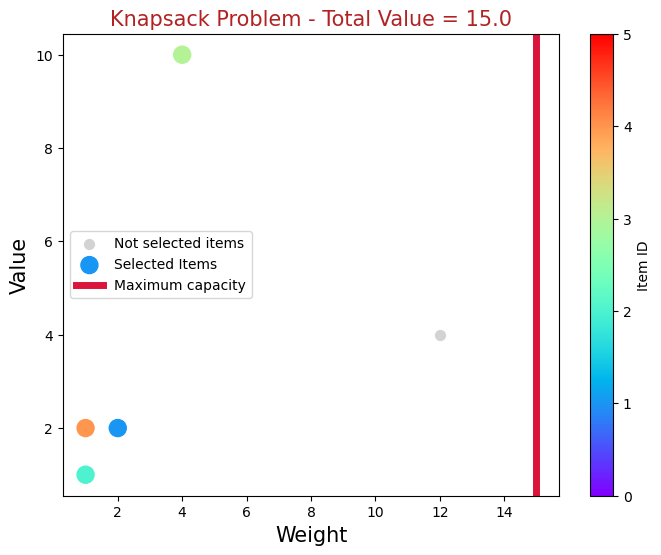

In [16]:
fig, ax = plt.subplots(figsize = [8, 6])
im = ax.scatter(w, v, s = 50, color = 'lightgrey', label = 'Not selected items')
im = ax.scatter(np.array(w)[selected], np.array(v)[selected], s = 150, c=np.array(I)[selected], vmin = 0, vmax= len(I), cmap = 'rainbow', label = 'Selected Items')

# Plot the maximum weight constraint as a horizontal line
ax.axvline(x=c, linewidth = 5, color='crimson', label = 'Maximum capacity')

# Add labels to the axes and title to the plot
ax.set_xlabel('Weight', fontsize= 15)
ax.set_ylabel('Value', fontsize= 15)
ax.set_title('Knapsack Problem - Total Value = {0}'.format(m.objective_value), color = 'firebrick', fontsize= 15)

# Display the plot
plt.legend()
plt.colorbar(im).set_label('Item ID')
